# The Orienteering Problem

## Risoluzione tramite algoritmo esatto (formulazione MTZ)

### Valerio Domenico Conte M63001606

## Import delle librerie

In [1]:
import math

import gurobipy as gp
from gurobipy import GRB

import matplotlib.pyplot as plt

## Lettura dei dati dell'istanza

### Il nostro è un problema su un grafo $G(V,A)$, dove $V$ è l'insieme dei nodi mentre $A$ è l'insieme degli archi. Le regole prevedono che si parte dal nodo origine $1$ e alla fine del percorso si arriva al nodo destinazione $n$. I dati del problema sono:

### $d_{ij}$: distanza euclidea tra il nodo $i$ e il nodo $j$;
### $s_i$: punteggio associato al nodo $i$;
### $\text{Tmax}$: budget di tempo a disposizione per esplorare il grafo.

In [2]:
#path = "op_tmax_60.txt"
path = "set_66_1_120.txt"

file = open(path, "r")

rules = file.readline().split("\t")

Tmax = int(rules[0])
P = int(rules[1])

positions = []
S = []

for line in file:
    x, y, score = line.split("\t")
    positions.append((float(x), float(y)))
    S.append(int(score))
    
file.close()

last_node = positions.pop(1)
positions.append(last_node)

last_score = S.pop(1)
S.append(last_score)
    
def getDistanceMatrix(positions):
    distance_matrix = []
    
    for item1 in positions:
        tmp_list = []
        for item2 in positions:
            tmp_distance = math.sqrt((item1[0]-item2[0])**2+(item1[1]-item2[1])**2)     
            tmp_list.append(tmp_distance)
        distance_matrix.append(tmp_list)
    return distance_matrix

# Usiamo la matrice di adiacenza per memorizzare le distanze tra i nodi
distance_map = getDistanceMatrix(positions)

# Numero di nodi nel grafo
n = len(S)

## Creazione del modello

### Usiamo le seguenti variabili di decisione per modellare il problema:

### $x_{ij} \in \{0,1\}$ per indicare se l'arco $(i,j) \in A$ è percorso o meno;
### $y_i \in \{0,1\}$ per indicare se il nodo $i \in V$ è visitato o meno;
### $u_i \in \mathbb{Z} $ per mantenere l'ordine di visita del nodo $i$; se $n$ è la cardinalità di $V=\{1,...,n\}$, cioè il numero di nodi del grafo:
### $$ 0 \leq u_i \leq n-1 \ \ \ i \in V $$

In [3]:
mod = gp.Model("OP")

X_idx = [(i, j) for i in range(1, n+1) for j in range(1, n+1)]
YU_idx = [i for i in range(1, n+1)]

Xvars = mod.addVars(X_idx, vtype=GRB.BINARY, name="X")
Yvars = mod.addVars(YU_idx, vtype=GRB.BINARY, name="Y")
Uvars = mod.addVars(YU_idx, vtype=GRB.INTEGER,lb=0, ub=n-1, name="U")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-11


## Funzione obiettivo

### L'obiettivo è massimizzare il punteggio finale:

### $$\max_{} \sum_{i \in V} s_i y_i$$

In [4]:
mod.setObjective(gp.quicksum([(S[i] * Yvars[i+1]) for i in range(n)]), GRB.MAXIMIZE)

## Creazione dei vincoli

### Il nodo origine deve avere solo un arco uscente mentre il nodo destinazione deve avere solo un arco entrante:

### $$ \sum_{\substack{j \in V \\ j \neq 1}} x_{1j} = \sum_{\substack{j \in V \\ j \neq n}} x_{jn} = 1 $$

In [5]:
mod.addConstr((gp.quicksum([Xvars[1, j+1] for j in range(n) if j != 0]) == 1), name="NODO_INIZIALE")

mod.addConstr((gp.quicksum([Xvars[j+1, n] for j in range(n) if j != n-1]) == 1), name="NODO_FINALE")

<gurobi.Constr *Awaiting Model Update*>

### Per ogni altro nodo, se selezioniamo un arco entrante dobbiamo selezionare anche un arco uscente, dunque un nodo intermedio è visitato se ha un arco entrante e un arco uscente. Con i seguenti vincoli aasicuriamo allora la conservazione del flusso:

### $$\sum_{\substack{j \in V \\ i \neq j}} x_{ji} = y_i \ \ \ i \in V \backslash \{1\} $$
### $$\sum_{\substack{j \in V \\ i \neq j}} x_{ij} = y_i \ \ \ i \in V \backslash \{n\} $$

In [6]:
#mod.addConstrs((gp.quicksum([Xvars[j+1, i+1] for i in range(n)]) == gp.quicksum([Xvars[i+1, j+1] for i in range(n)]) for j in range(2, n-1)), name="NODI_INTERMEDI")

mod.addConstrs((gp.quicksum([Xvars[j+1, i+1] for j in range(n) if i != j]) == Yvars[i+1] for i in range(n) if i != 0), name="NODI_INTERMEDI_IN")
mod.addConstrs((gp.quicksum([Xvars[i+1, j+1] for j in range(n) if i != j]) == Yvars[i+1] for i in range(n) if i != n-1), name="NODI_INTERMEDI_OUT")


{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>

### I nodi iniziale e finale devono essere sempre visitati:

### $$ y_1 = 1 $$
### $$ y_n = 1 $$

In [7]:
#mod.addConstrs((gp.quicksum([Xvars[i+1, j+1] for i in range(n)]) == Yvars[j+1] for j in range(n)), name="NODI_VISITATI_Y")

mod.addConstr(Yvars[1] == 1, name="NODO_INIZIALE_VISITATO")
mod.addConstr(Yvars[n] == 1, name="NODO_FINALE_VISITATO")

<gurobi.Constr *Awaiting Model Update*>

### Il circuito percorso non può avere una durata maggiore di $\text{Tmax}$:

### $$ \sum_{i \in V} \sum_{\substack{j \in V \\ i \neq j}} d_{ij} x_{ij} \leq \text{Tmax} $$

In [8]:
mod.addConstr((gp.quicksum([gp.quicksum([distance_map[i][j] * Xvars[i+1, j+1] for j in range(n) if i != j]) for i in range(n)]) <= Tmax), name="BUDGET_TEMPOMAX")

<gurobi.Constr *Awaiting Model Update*>

### Vincoli di posizione e assenza di subtour:

### $$ u_1 = 0 \text{ (il nodo 1 deve essere visitato per primo)} $$
### $$ u_j - u_i \geq 1 - n(1 - x_{ij}) \ \ \ i,j \in V, \ i \neq j, \ j \neq 1 $$


In [9]:
mod.addConstr(Uvars[1] == 0, name="POSIZIONE_1")
mod.addConstrs((Uvars[i] - Uvars[j] + n*Xvars[i,j] <= n - 1 for i in range(1,n+1) for j in range(1,n+1) if (i != j and j != 1)), name="ELIMINAZIONE_SUBTOUR")

{(1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (1, 8): <gurobi.Constr *Awaiting Model Update*>,
 (1, 9): <gurobi.Constr *Awaiting Model Update*>,
 (1, 10): <gurobi.Constr *Awaiting Model Update*>,
 (1, 11): <gurobi.Constr *Awaiting Model Update*>,
 (1, 12): <gurobi.Constr *Awaiting Model Update*>,
 (1, 13): <gurobi.Constr *Awaiting Model Update*>,
 (1, 14): <gurobi.Constr *Awaiting Model Update*>,
 (1, 15): <gurobi.Constr *Awaiting Model Update*>,
 (1, 16): <gurobi.Constr *Awaiting Model Update*>,
 (1, 17): <gurobi.Constr *Awaiting Model Update*>,
 (1, 18): <gurobi.Constr *Awaiting Model Update*>,
 (1, 19): <gurobi.Constr *Awaiting Model Update*>,
 (1, 20): <gurobi.Constr *Awaiting Model Update*>,
 (1, 21): <gurobi.Constr *Awaiting Mode

## Risoluzione del modello

In [10]:
#mod.write("op_60.lp")

mod.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4361 rows, 4488 columns and 25678 nonzeros
Model fingerprint: 0x4c8cf083
Variable types: 0 continuous, 4488 integer (4422 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [5e+00, 4e+01]
  Bounds range     [1e+00, 6e+01]
  RHS range        [1e+00, 1e+02]
Presolve removed 5 rows and 70 columns
Presolve time: 0.03s
Presolved: 4356 rows, 4418 columns, 25476 nonzeros
Variable types: 0 continuous, 4418 integer (4353 binary)
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective 35.0000000
Found heuristic solution: objective 50.0000000
Found heuristic solution: objective 70.0000000

Root relaxation: objective 1.652500e+03, 2312 iterations, 0.06 seconds (0.15 work units)

    Nodes    |    Current Node    |     Objective Bounds   

## Visualizzazione dei risultati

In [11]:
print("Valore della funzione obiettivo: ", mod.objVal)

print("Tempo impiegato: ", mod.Runtime)

Valore della funzione obiettivo:  1625.0
Tempo impiegato:  17.794708013534546


## Preleva soluzione e crea lista dei nodi in tour

In [12]:
Xvals = mod.getAttr("X", Xvars)
Yvals = mod.getAttr("X", Yvars)
Uvals = mod.getAttr("X", Uvars)

# Crea una lista di tuple contenente i nodi e il loro ordine di visita
nodes_and_positions = [(i, Uvals[i]) for i in range(1, n+1) if Yvals[i] > 0.5]

# Ordina i nodi in base alla loro posizione nella soluzione
sorted_nodes = sorted(nodes_and_positions, key=lambda x: x[1])

# Estrai solo i nodi, ignorando le posizioni
sortedPos = [node-1 for node, _ in sorted_nodes]

# Stampa l'ordine dei nodi da visitare
if (mod.status == GRB.OPTIMAL):
    print("Soluzione ottima:", sortedPos)
else:
    print("Soluzione migliore fino a questo momento:", sortedPos)

Soluzione migliore fino a questo momento: [0, 36, 44, 53, 54, 62, 61, 60, 52, 51, 59, 58, 57, 49, 50, 42, 41, 33, 25, 17, 18, 26, 34, 35, 27, 19, 11, 10, 9, 1, 2, 3, 4, 12, 20, 21, 22, 23, 15, 14, 13, 5, 6, 7, 8, 16, 24, 32, 31, 39, 40, 48, 56, 64, 63, 55, 47, 46, 38, 37, 65]


## Plottiamo la soluzione

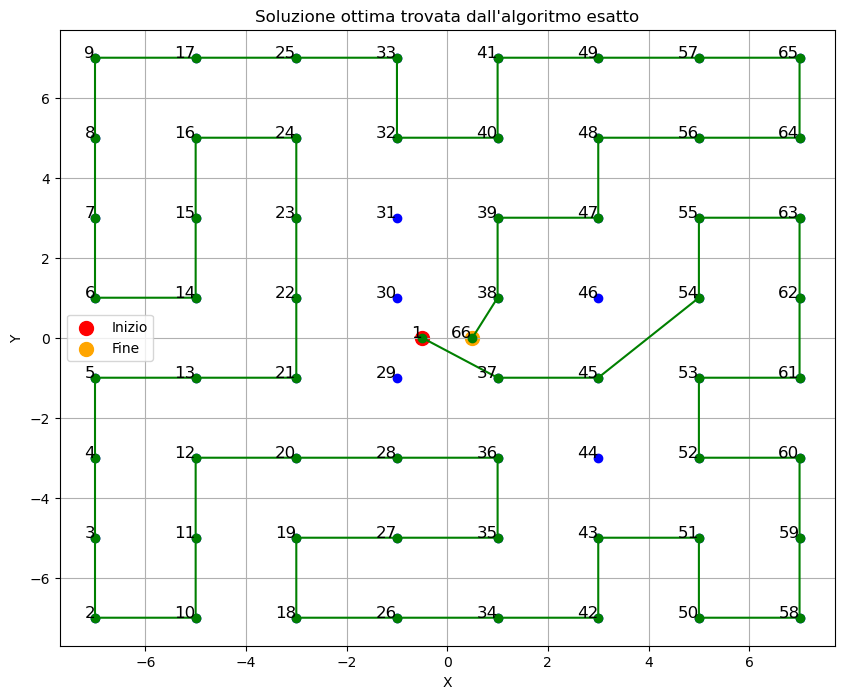

In [13]:
%matplotlib inline

def plot_path(node_positions, path):
    # Estrarre le coordinate dei nodi nel percorso
    x = [node_positions[i][0] for i in path]
    y = [node_positions[i][1] for i in path]

    plt.figure(figsize=(10, 8))
    plt.scatter(*zip(*node_positions), c='blue')
    
    # Annotare i nodi con le loro etichette
    for idx, (x_pos, y_pos) in enumerate(node_positions):
        plt.text(x_pos, y_pos, str(idx+1), fontsize=12, ha='right')
    
    # Disegnare il percorso
    plt.plot(x, y, linestyle='-', marker='o', color='green')

    # Evidenziare l'inizio e la fine del percorso
    plt.scatter(node_positions[path[0]][0], node_positions[path[0]][1], c='red', s=100, label='Inizio')
    plt.scatter(node_positions[path[-1]][0], node_positions[path[-1]][1], c='orange', s=100, label='Fine')
    
    plt.title("Soluzione ottima trovata dall'algoritmo esatto")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid()
    plt.show()

# Eseguire la funzione per disegnare il percorso
plot_path(positions, sortedPos)